In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys
import os

from brian2 import *
from brian2tools import *

In [27]:
start_scope()

time_step = 20 # ms
sim_steps = 100
N = 4
starting_value = 50

global stimulus_values, SPM_P_STIMULUS, stimulus

stimulus_values = starting_value*np.ones((sim_steps,N))*Hz

P_STIMULUS = PoissonGroup(N, rates=stimulus_values[0,:], name='P_STIMULUS')

SPM_P_STIMULUS = SpikeMonitor(P_STIMULUS)

In [28]:
def get_agent_timestep(t, sim_time_step):
    return int((t/ms + 0.5) / sim_time_step)


def extract_spike_counts(SPM, t, time_step):
    '''
    Count spikes for each neuron in the [t-time_step, t] interval
    of the simulation
    '''
    spike_trains = SPM.spike_trains()
    neurons = np.zeros(len(SPM.spike_trains()), dtype=int)
    for idx in range(len(spike_trains)):
        spike_train = spike_trains[idx]
        neurons[idx] = len(spike_train[(spike_train > t-time_step*ms) & (spike_train < t)])
    return neurons


global memory_, memory_history
memory_history = starting_value * np.ones((sim_steps,N))
memory_ = starting_value * np.ones(N)


@network_operation(dt=time_step*ms, when='start', order=0, name='accumulator')
def accumulator(t):
    global memory_, memory_history, stimulus_values, SPM_P_STIMULUS, stimulus
    
    timestep = get_agent_timestep(t, time_step)
    
    if t < time_step*ms:
        return
    spike_trains = SPM_P_STIMULUS.spike_trains()
    neurons = extract_spike_counts(SPM_P_STIMULUS, t, time_step)    
        
    mem_update = neurons 
    memory_ = memory_history[timestep-1,:]
    memory_ += mem_update * 0.05
    memory_ -= 0.025 * (1./(mem_update+0.1))
    memory_ = np.clip(memory_, 0, np.inf)
    memory_history[timestep,:] = memory_

    
    stimulus_values[timestep,:] = 50*Hz+timestep*10*Hz#memory_*Hz


In [29]:

net = Network(collect())
for ts in range(sim_steps):
    net.run(time_step *ms)
    #stimulus = TimedArray(stimulus_values*Hz, dt=1.*time_step*ms, name='stimulus')
    P_STIMULUS.rates = stimulus_values[ts,:]
    #print(stimulus_values)
    #print(spike_mon.i, spike_mon.t + runtime)
    print(stimulus_values[ts,:])

[50. 50. 50. 50.] Hz
[60. 60. 60. 60.] Hz
[70. 70. 70. 70.] Hz
[80. 80. 80. 80.] Hz
[90. 90. 90. 90.] Hz
[100. 100. 100. 100.] Hz
[110. 110. 110. 110.] Hz
[120. 120. 120. 120.] Hz
[130. 130. 130. 130.] Hz
[140. 140. 140. 140.] Hz
[150. 150. 150. 150.] Hz
[160. 160. 160. 160.] Hz
[170. 170. 170. 170.] Hz
[180. 180. 180. 180.] Hz
[190. 190. 190. 190.] Hz
[200. 200. 200. 200.] Hz
[210. 210. 210. 210.] Hz
[220. 220. 220. 220.] Hz
[230. 230. 230. 230.] Hz
[240. 240. 240. 240.] Hz
[250. 250. 250. 250.] Hz
[260. 260. 260. 260.] Hz
[270. 270. 270. 270.] Hz
[280. 280. 280. 280.] Hz
[290. 290. 290. 290.] Hz
[300. 300. 300. 300.] Hz
[310. 310. 310. 310.] Hz
[0.32 0.32 0.32 0.32] kHz
[0.33 0.33 0.33 0.33] kHz
[0.34 0.34 0.34 0.34] kHz
[0.35 0.35 0.35 0.35] kHz
[0.36 0.36 0.36 0.36] kHz
[0.37 0.37 0.37 0.37] kHz
[0.38 0.38 0.38 0.38] kHz
[0.39 0.39 0.39 0.39] kHz
[0.4 0.4 0.4 0.4] kHz
[0.41 0.41 0.41 0.41] kHz
[0.42 0.42 0.42 0.42] kHz
[0.43 0.43 0.43 0.43] kHz
[0.44 0.44 0.44 0.44] kHz
[0.45 0.45 

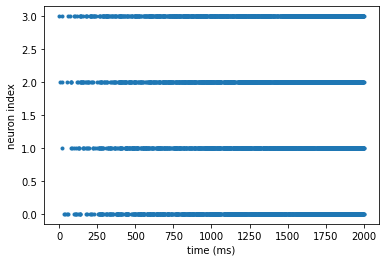

In [30]:
brian_plot(SPM_P_STIMULUS)

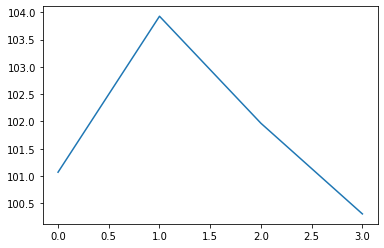

In [21]:
plt.plot(memory_)

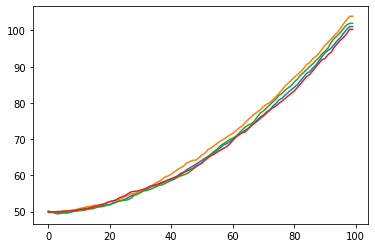

In [22]:
plt.plot(memory_history)

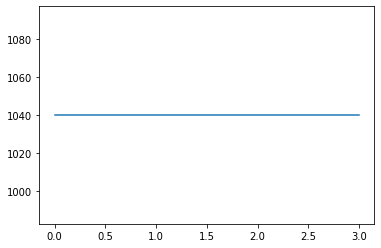

In [23]:
plt.plot(stimulus_values)